In [147]:
import numpy as np
import matplotlib.pyplot as plt

class WindyGridworld:
    def __init__(self, N=11):
        self.N = N
        self.action_space = [np.array([i, j]) for i in range(-1, 2) for j in range(-1, 2)]
#         self.action_space = [np.array([1, 0]), np.array([-1, 0]), np.array([0, 1]), np.array([0, -1])]
        self.num_actions = len(self.action_space)
        self.reset_position()
        self.setup_map()
        
    def setup_map(self):
        self.map = np.zeros((self.N, self.N))
        self.map[:, [4, 5, 6, 9]] = -1
        self.map[:, [7, 8]] = -2

    def reset_position(self):
        self.position = np.array([self.N//2, 0])
        return self.position
        
    def step(self, action):
        A = self.action_space[action].copy()
        A[0] += self.map[self.position[0], self.position[1]]
        self.position = np.clip(self.position + A, np.array([0, 0]), np.array([self.N-1, self.N-1]))
        reward = -1
        done = (self.position == np.array([self.N//2, self.N-3])).all()
        if done:
            reward = 0
        return self.position, reward, done
    
    def state_to_index(self, state):
        return state[0]*self.N + state[1]
    
    def sample_action(self):
        return np.random.choice(self.num_actions)
    
    def plot_policy(self, policy, scaling=0.3):
        plt.figure(figsize=(10, 10))
        m = self.map.copy()
        m[self.N//2, 0] = 4
        m[self.N//2, self.N-2] = 5
        plt.imshow(m)
        for i in range(self.N):
            for j in range(self.N):
                action = policy(self.state_to_index((i, j)))
                A = self.action_space[action].copy()
                dx = scaling*A[1]
                dy = scaling*A[0]
                plt.arrow(j, i, dx, dy, head_width=0.2, head_length=0.1)
    
    def follow_policy(self, policy, maxiter=100):
        state = self.reset_position()
        hist = []
        done = False
        i = 0
        while not done and i < maxiter:
            i += 1
            action = policy(self.state_to_index(state))
            new_state, reward, done  = self.step(action)
            hist.append((state, action, reward))
            state = new_state
        return hist
        

In [148]:
WG = WindyGridworld()

Q = np.zeros((WG.N**2, WG.num_actions))
eps_max = 0.1
alpha = 0.5
gamma = 1
episodes = 10000


In [149]:
for episode in range(episodes):
    state = WG.reset_position()
    eps = eps_max#/(episode + 1)
    state_idx = WG.state_to_index(state)
    if np.random.uniform() <= eps:
        action = WG.sample_action()
    else:
        action = np.argmax(Q[state_idx, ])
    done = False
    returns = []
    while not done:
        new_state, reward, done = WG.step(action)
        new_state_idx = WG.state_to_index(new_state)
        if np.random.uniform() <= eps:
            new_action = WG.sample_action()
        else:
            new_action = np.argmax(Q[new_state_idx, ])
        Q[state_idx, action] += alpha*(reward + gamma*Q[new_state_idx, new_action] - Q[state_idx, action])
        state = new_state
        state_idx = new_state_idx
        action = new_action
        returns.append(reward)
    print("\rEpisode %d with a return of %f!" % (episode+1, np.mean(returns)), end="")


Episode 10000 with a return of -0.888889!

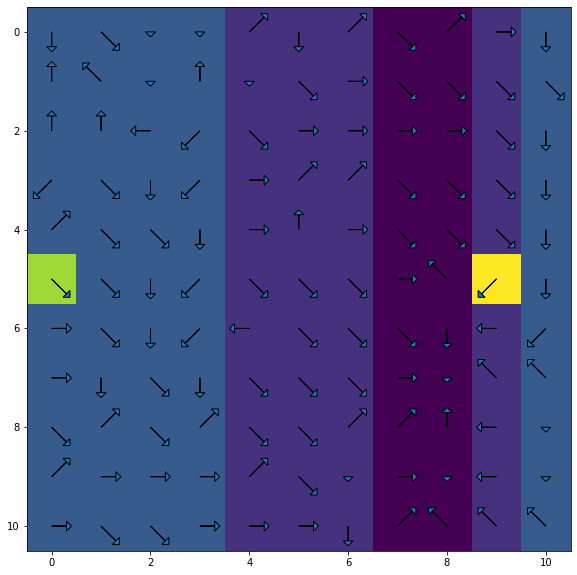

In [150]:
pi = lambda s: np.argmax(Q[s, ])
WG.plot_policy(pi)

In [151]:
WG.follow_policy(pi)

[(array([5, 0]), 8, -1),
 (array([6, 1]), 8, -1),
 (array([7, 2]), 8, -1),
 (array([8, 3]), 2, -1),
 (array([7, 4]), 8, -1),
 (array([7, 5]), 8, -1),
 (array([7, 6]), 8, -1),
 (array([7, 7]), 5, 0)]

In [152]:
WG.action_space[5]

array([0, 1])

In [153]:
WG.map

array([[ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -2., -2., -1.,  0.]])